In [3]:
import torch
import torchvision
from torchvision import transforms, datasets

In [4]:
import torch.nn as nn
import torch.nn.functional as F

In [5]:
import os
import cv2
import numpy as np
from tqdm import tqdm

In [20]:
REBUILD_DATA = True

class RigidVSNonrigid():
    IMG_SIZE=28
    RIGID = "Images/Rigid"
    NONRIGID = "Images/NonRigid"
    LABELS = {RIGID: 0, NONRIGID: 1}
    
    training_data = []
    rigidcount = 0
    nonrigidcount = 0
    
    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                try:
                    path = os.path.join(label,f)
                    img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img,(self.IMG_SIZE, self.IMG_SIZE))
                    self.training_data.append([np.array(img),np.eye(2)[self.LABELS[label]]])

                    if label == self.RIGID:
                        self.rigidcount += 1
                    elif label == self.NONRIGID:
                        self.nonrigidcount += 1
                    else:
                        print(label)
                        print(self.RIGID)
                        print(self.NONRIGID)
                except Exception as e:
                    pass
        np.random.shuffle(self.training_data)
        np.save("training_data.npy",self.training_data)
        print("Rigid:",self.rigidcount)
        print("Nonrigid:",self.nonrigidcount)

        
if REBUILD_DATA:
    rigidvnonrigid = RigidVSNonrigid()
    rigidvnonrigid.make_training_data()
                    

  1%|█                                                                                | 787/60000 [00:00<00:07, 7865.60it/s]

Images/Rigid


  1%|█                                                                                | 777/60000 [00:00<00:07, 7729.19it/s]

Images/NonRigid


100%|███████████████████████████████████████████████████████████████████████████████| 60000/60000 [00:07<00:00, 7640.91it/s]


Rigid: 60000
Nonrigid: 60000


In [6]:
training_data = np.load("training_data.npy",allow_pickle=True)

In [7]:
print(len(training_data))

120000


In [8]:
print(training_data[0])

[array([[  0,   0,   0,   5,   9,   0,   0,   6,   4,   0,   4,   0,   0,
          5,   0,   4,   0,   0,   0,   1,   0,   0,   0,   5,   0,   2,
          3,   1],
       [  3,   0,   0,   0,   0,   0,   3,   5,   7,   0,   0,   0,   0,
          0,   0,   0,   8,   3,   0,   1,   0,   0,   0,   0,   4,   5,
          2,   0],
       [  7,   1,   1,   0,   0,   5,   4,   0,   0,   0,   6,   5,   8,
         13,   1,   3,   0,   0,   3,  16,  19,  12,   3,   0,   1,   0,
          0,   0],
       [  0,   0,   1,   8,   3,   4,   7,   0,   5,   2,  11,   0,   0,
         10,  11,  23,  29,  34,  47,  61,  64,  52,  37,  28,  48,  44,
         20,   5],
       [  0,   0,   4,  10,   0,   0,   0,   4,   6,  25,  58,  61,  62,
         72,  71,  82,  87, 104, 120, 114,  87,  63,  62,  73,  66,  66,
         32,   3],
       [  0,  28,  55,  70,  74,  61,  60,  80,  87, 108, 137, 127, 110,
        103,  86,  87,  88,  65,  58,  90, 131, 136, 100,  62,  83,  91,
         45,   0],
       [ 

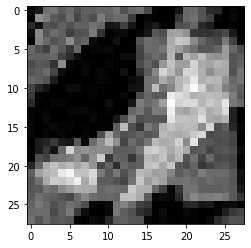

In [12]:
import matplotlib.pyplot as plt

plt.imshow(training_data[0][0],cmap="gray")
plt.show()